# Lifestyle & Sleep Patterns — Data Analytics and How to Approach It with Pandas

## 1. Introduction

Sleep is shaped by more than just how many hours we spend in bed. Age, occupation, stress levels, physical activity, body composition, and even heart rate patterns all interact to influence not only the *duration* of sleep but also its *quality*. Some people may get seven hours but wake unrefreshed, while others with different lifestyle profiles experience restorative rest with the same number of hours.

This dataset captures many of those variables - from **gender, age, and occupation**, through **sleep duration, quality, and disorder status**, to **activity, stress, daily steps, BMI, blood pressure, and heart rate**. Together, these form a multidimensional picture of how lifestyle and physiology intersect with sleep outcomes.

The question, then, is: how do we take this raw information and actually learn something from it? That’s where **data manipulation and visualisation** become essential. Using **Pandas** for structuring and exploring the data, and plotting libraries like **Matplotlib** or **Seaborn** for visualisation, we can reveal trends and correlations that aren’t obvious at first glance.

In this notebook we will:

1. **Load and structure the dataset** so the information is reliable and workable.
2. **Manipulate the data** - grouping, filtering, and transforming - to uncover distributions and relationships.
3. **Compute descriptive statistics** to quantify averages, variability, and outliers.
4. **Explore correlations and trends** across categories like age, stress, and physical activity versus sleep outcomes.
5. **Visualise the insights** in intuitive plots that make complex interactions easy to grasp.

The aim is to demonstrate how structured analysis can surface meaningful patterns - helping us understand, at a glance, the kinds of relationships that might matter most when studying lifestyle and sleep.

## 2. Setup — Libraries & Environment

Any meaningful exploration begins with the right tools. In neuroscience, this might mean calibrated electrodes or imaging equipment; in data analysis, our “lab bench” is the computational environment. Getting this right ensures that every step that follows is reliable and reproducible.

The core tools we’ll use are:

* **Python** - The language itself. Think of it as the operating system for our analysis: human-readable, flexible, and supported by a massive ecosystem of libraries. It gives us the syntax and structure to build everything else on.
* **Pandas** - The data manipulation library. Built on top of NumPy, it provides the **DataFrame** object — essentially a digital spreadsheet that can be indexed, grouped, merged, and transformed with precision. This is the primary tool for cleaning, organising, and exploring structured datasets.
* **NumPy** - The mathematical engine. It delivers fast, vectorised operations on arrays and matrices, allowing calculations that would be slow in plain Python to run at near-C speed. Pandas and many scientific libraries rely on NumPy to handle the heavy numerical lifting.
* **Matplotlib** — The visualisation layer. Matplotlib is the foundational plotting library in Python: it allows full control over charts, axes, and figures. Seaborn builds on it to provide higher-level, aesthetically optimised plots with just a few lines of code. Together, they let us turn tables of numbers into graphs, trends, and insights that are easy to interpret at a glance.

To ensure consistency, it’s best to isolate your work in a virtual environment and install the required packages from a `requirements.txt` file. This way, the environment you’re working in matches the one used here, reducing version conflicts and subtle discrepancies.

```bash
# Create a virtual environment (recommended)
python -m venv venv
source venv/bin/activate    # macOS/Linux
venv\Scripts\activate       # Windows

# Install the required libraries
python -m pip install -r requirements.txt
```

Now that the environment is prepared, we can import the libraries into our notebook.

In [1]:
# Import the core libraries for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# Set Pandas display options for clarity
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 120)

# Confirmation message
print("Libraries loaded successfully.")

Libraries loaded successfully.


This setup guarantees that the subsequent steps — data loading, cleaning, statistical analysis, and visualisation — will be reproducible and interpretable, just as a properly calibrated lab instrument guarantees reliable measurements.

## 3. Load Dataset — Access & First Glance

At this point, we’ve prepared the tools - now we turn to the data itself. This stage is a bit like walking into the lab for the first time and laying your samples out on the bench. You’re not running experiments yet, you’re just orienting yourself.

The first exposure to a dataset is similar to a physician’s initial assessment of a patient. Before ordering scans or running advanced tests, the doctor looks, listens, and takes basic vital signs. In data science, we do the same: we load the dataset and ask some simple, grounding questions.

Is the file in the right place so our notebook can actually read it? How many rows and columns are we dealing with? A dataset of fifty rows is a very different situation from one with fifty thousand. And what do the first few entries look like? This quick glance reveals column names, the types of values we’re working with, and whether the structure matches our expectations.

At this stage we’re not analysing. We’re orienting. Just as a clinician checks pulse and blood pressure before doing anything more invasive, we’re getting a feel for the scale and structure of the information before we begin deeper work.

**Where to place the file:**
The dataset we’ll use is the Kaggle release *“Lifestyle and Sleep Patterns.”* To keep the project organised, save the CSV file into a folder called `data/` inside your project directory. We’ll refer to it as:

```
data/lifestyle_and_sleep.csv
```

This ensures clarity and reproducibility — your analysis is grounded on a well-defined, well-structured starting point.

**How to load and inspect:**

In [2]:
# Define the path to the dataset
DATASET_PATH = Path("data/lifestyle_and_sleep.csv")

# Safety check: does the file exist?
assert DATASET_PATH.exists(), f"CSV file not found at {DATASET_PATH}. Please place the dataset in the 'data/' folder."

# Load the dataset into Pandas
lifestyle_sleep_dataframe = pd.read_csv(DATASET_PATH)

# Quick inspection: shape and first few rows
print("Number of rows:", lifestyle_sleep_dataframe.shape[0], "| Number of columns:", lifestyle_sleep_dataframe.shape[1])
lifestyle_sleep_dataframe.head()

Number of rows: 374 | Number of columns: 13


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 4. Understand Schema — Column Meanings

Once the dataset is loaded, the next step is to understand its **schema** - the structure and meaning of its columns. Think of this like learning the anatomy of a biological system: before you can measure or intervene, you need to know what each part represents and how it is labelled.

The first step is **normalising the column names**. Datasets often arrive with inconsistent naming - one column might be `Sleep Duration`, another `sleep_duration`, or even `Hours of Sleep`. Standardising these into a clean, consistent format such as lowercase with underscores (`sleep_duration`) prevents fragile code and makes every step of the analysis easier to read and maintain.

Next is **identifying the key variables**. To study sleep properly, we anchor ourselves in dimensions such as:

* **sleep\_duration**
* **quality\_of\_sleep**
* **stress\_level**
* **physical\_activity\_level**
* **age**
* **occupation**
* **bmi\_category**
* **sleep\_disorder**

These are the vital signs of the dataset, the reference points that will shape how we explore trends and correlations.

Finally, this stage is about **preparing for analysis**. Once we know the schema, and we can refer to columns unambiguously, we’re in a position to decide what kinds of statistical comparisons or visualisations will make sense.

It’s essentially a checklist: before running experiments, confirm that the right measures are present and that they’re clearly defined.

**How to normalise and detect variables:**

In [3]:
# Normalise column names: lowercase + snake_case
def normalise_column_name(column_name: str) -> str:
    column_name = column_name.strip().lower()
    column_name = re.sub(r'[^a-z0-9]+', '_', column_name).strip('_')
    return column_name

lifestyle_sleep_dataframe = lifestyle_sleep_dataframe.copy()
lifestyle_sleep_dataframe.columns = [normalise_column_name(column) for column in lifestyle_sleep_dataframe.columns]

print("Normalised column names:\n", lifestyle_sleep_dataframe.columns.tolist())

# Detect likely columns for our key measures
def find_matching_column(candidate_columns, keywords):
    for candidate in candidate_columns:
        for keyword in keywords:
            if keyword in candidate:
                return candidate
    return None

all_columns = lifestyle_sleep_dataframe.columns.tolist()

sleep_duration_column        = find_matching_column(all_columns, ['sleep_duration','sleep_hours','hours_of_sleep','sleep_time','sleep'])
sleep_quality_column         = find_matching_column(all_columns, ['quality_of_sleep','sleep_quality'])
stress_level_column          = find_matching_column(all_columns, ['stress_level','stress'])
screen_time_column           = find_matching_column(all_columns, ['screen_time','screentime'])
physical_activity_column     = find_matching_column(all_columns, ['physical_activity_level','activity_level','exercise','physical_activity'])
daily_steps_column           = find_matching_column(all_columns, ['daily_steps','steps'])
age_column                   = find_matching_column(all_columns, ['age'])
gender_column                = find_matching_column(all_columns, ['gender','sex'])
occupation_column            = find_matching_column(all_columns, ['occupation','job'])
bmi_category_column          = find_matching_column(all_columns, ['bmi_category','bmi'])
sleep_disorder_column        = find_matching_column(all_columns, ['sleep_disorder','insomnia','apnea'])

detected_columns = {
    'sleep_duration': sleep_duration_column,
    'sleep_quality': sleep_quality_column,
    'stress_level': stress_level_column,
    'screen_time': screen_time_column,
    'physical_activity': physical_activity_column,
    'daily_steps': daily_steps_column,
    'age': age_column,
    'gender': gender_column,
    'occupation': occupation_column,
    'bmi_category': bmi_category_column,
    'sleep_disorder': sleep_disorder_column
}

detected_columns

Normalised column names:
 ['person_id', 'gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder']


{'sleep_duration': 'sleep_duration',
 'sleep_quality': 'quality_of_sleep',
 'stress_level': 'stress_level',
 'screen_time': None,
 'physical_activity': 'physical_activity_level',
 'daily_steps': 'daily_steps',
 'age': 'age',
 'gender': 'gender',
 'occupation': 'occupation',
 'bmi_category': 'bmi_category',
 'sleep_disorder': 'sleep_disorder'}

**Interpretation:**
The dictionary `detected` now gives us a quick map of which variables exist in this dataset and what they’re called. This acts like a field guide: it tells us what signals are available to measure, and what might be missing. With this schema in place, we’re ready to clean and prepare the data for deeper analysis.

## 5. Clean Data — Ensuring Quality

Raw data almost never comes ready for interpretation. In neuroscience, if you record brain activity with EEG, the raw signal is full of noise — electrical interference, muscle artefacts, random fluctuations. Only after filtering and preprocessing can you begin to see the real rhythms of the brain.

Our dataset is no different. Before we can trust any patterns we find, we need to clean it. That process involves several careful checks.

First, **duplicates**. If the same row appears multiple times, it’s like counting the same participant twice in an experiment. That artificially inflates patterns and makes them look stronger than they really are.

Second, **missing values**. Gaps in data distort averages and weaken correlations. Sometimes these gaps can be filled in with a reasonable estimate, like a median, but for critical measures such as *sleep duration* it is often better to remove incomplete rows entirely.

Third, **data types**. Numbers that are stored as text — `"7"` instead of `7` — block valid calculations. These must be coerced into proper numerical form so that when we measure averages or correlations, the math is trustworthy.

Finally, **categories**. Labels such as `"male"`, `"Male"`, or `"MALE"` all mean the same thing, but unless we unify them into a single form, the analysis will treat them as separate groups.

The guiding principle here is signal over noise. By cleaning carefully and consistently, we ensure that what we later visualise are real relationships between lifestyle and sleep — not artefacts of messy data.

**How to clean the dataset:**

In [4]:
cleaned_lifestyle_sleep_dataframe = lifestyle_sleep_dataframe.copy()

# Standardise string columns
for column in cleaned_lifestyle_sleep_dataframe.select_dtypes(include='object').columns:
    cleaned_lifestyle_sleep_dataframe[column] = cleaned_lifestyle_sleep_dataframe[column].astype(str).str.strip()

# Title-case common categorical variables for consistency
for column in [gender_column, occupation_column, bmi_category_column, sleep_disorder_column]:
    if column and column in cleaned_lifestyle_sleep_dataframe.columns:
        cleaned_lifestyle_sleep_dataframe[column] = cleaned_lifestyle_sleep_dataframe[column].str.title()

# Coerce numeric columns
numeric_columns = [
    sleep_duration_column,
    sleep_quality_column,
    stress_level_column,
    physical_activity_column,
    screen_time_column,
    daily_steps_column,
    age_column
]
for column in numeric_columns:
    if column and column in cleaned_lifestyle_sleep_dataframe.columns:
        cleaned_lifestyle_sleep_dataframe[column] = pd.to_numeric(cleaned_lifestyle_sleep_dataframe[column], errors='coerce')

# Remove duplicates 
row_count_before = len(cleaned_lifestyle_sleep_dataframe)
cleaned_lifestyle_sleep_dataframe = cleaned_lifestyle_sleep_dataframe.drop_duplicates()
duplicates_removed = row_count_before - len(cleaned_lifestyle_sleep_dataframe)

# Handle missing values 
missing_sleep_count = 0
if sleep_duration_column and sleep_duration_column in cleaned_lifestyle_sleep_dataframe.columns:
    missing_sleep_count = cleaned_lifestyle_sleep_dataframe[sleep_duration_column].isna().sum()
    cleaned_lifestyle_sleep_dataframe = cleaned_lifestyle_sleep_dataframe.dropna(subset=[sleep_duration_column])  # drop rows missing core sleep data

for column in [sleep_quality_column, stress_level_column, physical_activity_column, screen_time_column, daily_steps_column, age_column]:
    if column and column in cleaned_lifestyle_sleep_dataframe.columns:
        median_value = cleaned_lifestyle_sleep_dataframe[column].median()
        cleaned_lifestyle_sleep_dataframe[column] = cleaned_lifestyle_sleep_dataframe[column].fillna(median_value)

# Quick QC report 
quality_check_report = {
    "rows_after_cleaning": len(cleaned_lifestyle_sleep_dataframe),
    "duplicates_removed": duplicates_removed,
    "dropped_rows_missing_sleep": int(missing_sleep_count),
    "null_counts": cleaned_lifestyle_sleep_dataframe.isna().sum().to_dict()
}
quality_check_report


{'rows_after_cleaning': 374,
 'duplicates_removed': 0,
 'dropped_rows_missing_sleep': 0,
 'null_counts': {'person_id': 0,
  'gender': 0,
  'age': 0,
  'occupation': 0,
  'sleep_duration': 0,
  'quality_of_sleep': 0,
  'physical_activity_level': 0,
  'stress_level': 0,
  'bmi_category': 0,
  'blood_pressure': 0,
  'heart_rate': 0,
  'daily_steps': 0,
  'sleep_disorder': 0}}

**Interpretation:**
This report gives us a snapshot of what was removed or imputed. The cleaned dataset (`cleaned_lifestyle_sleep_dataframe`) is now our working baseline. Just as a neuroscientist trusts only preprocessed EEG signals, we can now trust that the patterns we detect in this dataset are not artefacts of duplication or formatting noise.

## 6. Descriptive Statistics — Establishing Baselines

Before exploring complex relationships, we need to anchor ourselves in the basics. In neuroscience or medicine, researchers always begin by establishing **baseline measures**. In a sleep lab, for example, clinicians might first measure the average duration of deep sleep in healthy participants before comparing it with patients who have insomnia. These baselines provide orientation — they define what “typical” looks like and give us a reference point for spotting deviation.

For our dataset, the same principle applies. We start with the fundamentals:

* **Means and medians**. The mean gives us a central trend, but can be pulled by extreme values. The median is more robust to outliers. Taken together, they describe the heart of the data.
* **Standard deviation**. This measure shows us variability. Are most people clustered closely around the average sleep duration, or is there wide variation in how much rest different individuals get?
* **Category distributions**. For demographics and lifestyle groups such as gender, occupation, or BMI, simple counts reveal how the dataset is composed. This matters because if one group dominates, any apparent “effect” might just reflect that imbalance rather than a genuine trend.

By establishing these baselines, we create the backdrop for all subsequent analysis. It’s like checking vital signs before surgery — a way of ensuring that any deeper interpretation is grounded in a clear, stable understanding of the data’s overall structure.

**How to compute descriptive statistics:**

In [6]:
# Focus on key numeric variables
key_numeric_columns = [
    column for column in [
        sleep_duration_column,
        sleep_quality_column,
        stress_level_column,
        physical_activity_column,
        screen_time_column,
        daily_steps_column,
        age_column
    ] if column
]

# Summary statistics (mean, std, min, max, quartiles)
descriptive_statistics_table = (
    cleaned_lifestyle_sleep_dataframe[key_numeric_columns].describe().T
    if key_numeric_columns else pd.DataFrame()
)

# Save descriptive statistics to CSV for reference
output_path = Path("outputs/descriptive_statistics.csv")
output_path.parent.mkdir(parents=True, exist_ok=True)
descriptive_statistics_table.to_csv(output_path)

print(f"Descriptive statistics saved to {output_path}")
descriptive_statistics_table

Descriptive statistics saved to outputs\descriptive_statistics.csv


,count,mean,std,min,25%,50%,75%,max
sleep_duration,374.0,7.132086,0.795657,5.8,6.40,7.2,7.8,8.5
quality_of_sleep,374.0,7.312834,1.196956,4.0,6.00,7.0,8.0,9.0
stress_level,374.0,5.385027,1.774526,3.0,4.00,5.0,7.0,8.0
physical_activity_level,374.0,59.171123,20.830804,30.0,45.00,60.0,75.0,90.0
daily_steps,374.0,6816.844920,1617.915679,3000.0,5600.00,7000.0,8000.0,10000.0
age,374.0,42.184492,8.673133,27.0,35.25,43.0,50.0,59.0


**Categorical distributions:**

In [ ]:
# Inspect top categories for demographic and lifestyle fields
key_categorical_columns = [
    column for column in [
        gender_column,
        occupation_column,
        bmi_category_column,
        sleep_disorder_column
    ] if column
]

# Generate category counts (top 10 for each)
category_counts_dictionary = {
    column: cleaned_lifestyle_sleep_dataframe[column].value_counts().head(10)
    for column in key_categorical_columns
}

# Save each category distribution to CSV
output_directory = Path("outputs/category_counts")
output_directory.mkdir(parents=True, exist_ok=True)

for column_name, series in category_counts_dictionary.items():
    file_path = output_directory / f"{column_name}_counts.csv"
    series.to_csv(file_path, header=True)
    print(f"\nTop categories for {column_name}:\n", series)
    print(f"Saved to {file_path}")


Top categories for gender:
 gender
Male      189
Female    185
Name: count, dtype: int64
Saved to outputs\category_counts\gender_counts.csv

Top categories for occupation:
 occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Name: count, dtype: int64
Saved to outputs\category_counts\occupation_counts.csv

Top categories for bmi_category:
 bmi_category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64
Saved to outputs\category_counts\bmi_category_counts.csv

Top categories for sleep_disorder:
 sleep_disorder
Nan            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64
Saved to outputs\category_counts\sleep_disorder_counts.csv


* These tables show the central tendencies and spread of sleep, stress, screen time, and activity.
* Category counts provide context: which groups are dominant, and which are underrepresented.
* With these baselines in place, we have a better general understanding of the data. We’ve mapped the contours, seen the distributions, and identified where the data is dense and where it is thin.

## 7. Correlations — Exploring Relationships

One of the first tools we turn to in data analysis is **correlation** — a measure of how strongly two variables move together. In practical terms, this lets us ask questions like: as daily screen time goes up, does sleep quality tend to go down? Or, as physical activity increases, do stress levels decrease?

But here’s the important distinction: **correlation is not causation**. Two variables might move together without one directly driving the other. They may both be influenced by a third factor — for example, age, occupation, or stress could shape both screen time and sleep quality simultaneously.

What correlations give us is a way to generate hypotheses. A link between stress and shorter sleep, for example, doesn’t prove that stress directly causes insomnia — but it does tell us that the relationship is worth exploring further.

Correlations also reveal patterns that aren’t obvious to the naked eye. As humans, we’re not naturally good at detecting subtle trends across thousands of data points. A correlation coefficient quantifies that relationship, turning intuition into something measurable.

Finally, correlations guide our next steps. Stronger relationships point us toward where to focus more detailed visualisation — scatter plots, subgroup comparisons, or eventually predictive modelling. They help us decide what deserves closer inspection, and what may just be noise.

**How to compute correlations:**

In [8]:
# Select only numeric columns from the cleaned dataset
numeric_columns_dataframe = cleaned_lifestyle_sleep_dataframe[
    [column for column in key_numeric_columns if column]
].dropna()

# Compute Pearson correlation matrix
pearson_correlation_matrix = numeric_columns_dataframe.corr(numeric_only=True)

# Save correlation matrix to CSV for reference
output_directory = Path("outputs")
output_directory.mkdir(parents=True, exist_ok=True)

correlation_output_path = output_directory / "pearson_correlation_matrix.csv"
pearson_correlation_matrix.to_csv(correlation_output_path)

print(f"Pearson correlation matrix saved to {correlation_output_path}")
pearson_correlation_matrix

Pearson correlation matrix saved to outputs\pearson_correlation_matrix.csv


,sleep_duration,quality_of_sleep,stress_level,physical_activity_level,daily_steps,age
sleep_duration,1.000000,0.883213,-0.811023,0.212360,-0.039533,0.344709
quality_of_sleep,0.883213,1.000000,-0.898752,0.192896,0.016791,0.473734
stress_level,-0.811023,-0.898752,1.000000,-0.034134,0.186829,-0.422344
physical_activity_level,0.212360,0.192896,-0.034134,1.000000,0.772723,0.178993
daily_steps,-0.039533,0.016791,0.186829,0.772723,1.000000,0.057973
age,0.344709,0.473734,-0.422344,0.178993,0.057973,1.000000


**Visualising correlations:**

Correlation matrix heatmap saved to outputs\plots\pearson_correlation_matrix.png


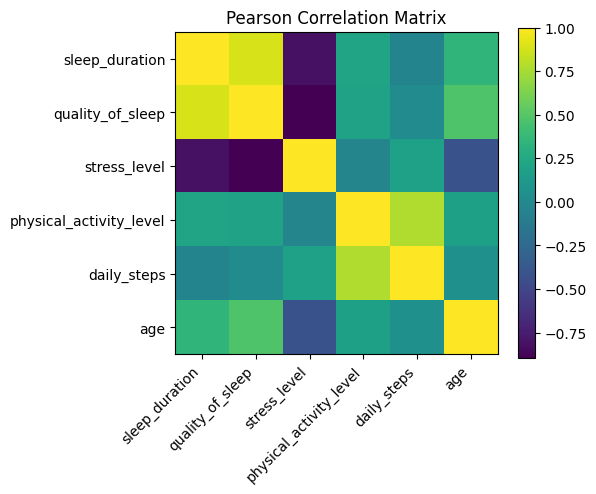

In [9]:
# Plot correlation matrix heatmap
plt.figure(figsize=(6, 5))
plt.imshow(pearson_correlation_matrix.values, interpolation='nearest')
plt.title("Pearson Correlation Matrix")
plt.xticks(range(len(pearson_correlation_matrix.columns)), pearson_correlation_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(pearson_correlation_matrix.index)), pearson_correlation_matrix.index)
plt.colorbar()
plt.tight_layout()

# Save the correlation matrix plot
plots_directory = Path("outputs/plots")
plots_directory.mkdir(parents=True, exist_ok=True)

correlation_matrix_plot_path = plots_directory / "pearson_correlation_matrix.png"
plt.savefig(correlation_matrix_plot_path, dpi=300)

print(f"Correlation matrix heatmap saved to {correlation_matrix_plot_path}")
plt.show()

* Values range from **-1.0** (perfect negative correlation) to **+1.0** (perfect positive correlation).
* For example, if stress level and sleep duration show a negative correlation (e.g., -0.45), this suggests that higher stress is associated with less sleep, but we cannot yet say *why*.
* The heatmap allows us to visually detect clusters of stronger associations, providing intuitive anchors for further exploration.

## 8. Visualisations — Sleep Duration as the Anchor

When exploring complex datasets, it’s often useful to choose one central outcome and use it as the reference point for everything else. Here, that anchor is **sleep duration**. Think of it like a biomarker in neuroscience — dopamine release, for example — against which we measure the influence of stress, activity, or genetic variation.

Sleep duration is the most fundamental measure of rest. Other factors — stress, physical activity, BMI, blood pressure, daily steps — may all shape its length, but by keeping sleep at the centre, we avoid drifting into arbitrary comparisons. Everything we look at ties back to this one outcome.

From there, we can branch outward in several directions. Demographic factors such as gender, age, and occupation give us a view of population-level differences. Physiological measures like heart rate, blood pressure, and BMI connect sleep duration to broader health markers. Lifestyle factors — stress, screen time, and daily steps — highlight the behaviour–sleep dynamics that may be most actionable. And categorical labels like the presence or absence of a sleep disorder serve as strong reference points: do these conditions consistently pull sleep duration away from the baseline?

This hub-and-spoke approach mirrors how neuroscience often studies one central process and maps the many systems that converge upon it. By treating sleep duration as our hub, every visualisation becomes anchored, and the patterns we discover remain tied to the outcome that matters most.

In [ ]:
# Helper plotting function for scatter
def scatter_plot(x_column, y_column, x_label=None, y_label=None, plot_title=None, filename=None):
    plt.figure(figsize=(6, 4))
    plt.scatter(cleaned_lifestyle_sleep_dataframe[x_column], cleaned_lifestyle_sleep_dataframe[y_column], alpha=0.6)
    plt.xlabel(x_label or x_column.replace('_', ' ').title())
    plt.ylabel(y_label or y_column.replace('_', ' ').title())
    plt.title(plot_title or f"{y_column} vs {x_column}")
    plt.tight_layout()

    # Save scatter plot if filename provided
    if filename:
        plots_directory = Path("outputs/plots")
        plots_directory.mkdir(parents=True, exist_ok=True)
        file_path = plots_directory / filename
        plt.savefig(file_path, dpi=300)
        print(f"Saved plot: {file_path}")

    plt.show()


# Sleep duration variable (core anchor)
sleep_duration_target = sleep_duration_column

# 1. Gender vs Sleep Duration (boxplot)
if gender_column and sleep_duration_target:
    plt.figure(figsize=(6, 4))
    cleaned_lifestyle_sleep_dataframe.boxplot(column=sleep_duration_target, by=gender_column, showfliers=False)
    plt.ylabel("Sleep Duration (hours)")
    plt.title("Sleep Duration by Gender")
    plt.suptitle("")
    plt.tight_layout()

    plots_directory = Path("outputs/plots")
    plots_directory.mkdir(parents=True, exist_ok=True)
    file_path = plots_directory / "sleep_duration_by_gender.png"
    plt.savefig(file_path, dpi=300)
    print(f"Saved plot: {file_path}")

    plt.show()

# 2. Age vs Sleep Duration (scatter)
if age_column and sleep_duration_target:
    scatter_plot(
        age_column,
        sleep_duration_target,
        "Age",
        "Sleep Duration (hours)",
        "Age vs Sleep Duration",
        "age_vs_sleep_duration.png"
    )

# 3. Occupation vs Sleep Duration (bar chart of group means)
if occupation_column and sleep_duration_target:
    average_sleep_by_occupation = (
        cleaned_lifestyle_sleep_dataframe.groupby(occupation_column)[sleep_duration_target].mean().sort_values(ascending=False)
    )
    plt.figure(figsize=(10, 5))
    average_sleep_by_occupation.plot(kind="bar")
    plt.ylabel("Average Sleep Duration (hours)")
    plt.title("Average Sleep Duration by Occupation")
    plt.tight_layout()

    file_path = plots_directory / "sleep_duration_by_occupation.png"
    plt.savefig(file_path, dpi=300)
    print(f"Saved plot: {file_path}")

    plt.show()

# 4. Physical Activity vs Sleep Duration
if physical_activity_column and sleep_duration_target:
    if pd.api.types.is_numeric_dtype(cleaned_lifestyle_sleep_dataframe[physical_activity_column]):
        scatter_plot(
            physical_activity_column,
            sleep_duration_target,
            "Physical Activity Level",
            "Sleep Duration (hours)",
            "Physical Activity vs Sleep",
            "physical_activity_vs_sleep.png"
        )
    else:
        cleaned_lifestyle_sleep_dataframe.boxplot(column=sleep_duration_target, by=physical_activity_column, showfliers=False)
        plt.ylabel("Sleep Duration (hours)")
        plt.title("Sleep Duration by Physical Activity Level")
        plt.suptitle("")
        plt.tight_layout()

        file_path = plots_directory / "sleep_duration_by_physical_activity.png"
        plt.savefig(file_path, dpi=300)
        print(f"Saved plot: {file_path}")

        plt.show()

# 5. Stress vs Sleep Duration
if stress_level_column and sleep_duration_target:
    scatter_plot(
        stress_level_column,
        sleep_duration_target,
        "Stress Level",
        "Sleep Duration (hours)",
        "Stress vs Sleep",
        "stress_vs_sleep.png"
    )

# 6. BMI vs Sleep Duration (boxplot)
if bmi_category_column and sleep_duration_target:
    cleaned_lifestyle_sleep_dataframe.boxplot(column=sleep_duration_target, by=bmi_category_column, showfliers=False)
    plt.ylabel("Sleep Duration (hours)")
    plt.title("Sleep Duration by BMI Category")
    plt.suptitle("")
    plt.tight_layout()

    file_path = plots_directory / "sleep_duration_by_bmi.png"
    plt.savefig(file_path, dpi=300)
    print(f"Saved plot: {file_path}")

    plt.show()

# 7. Blood Pressure vs Sleep Duration
blood_pressure_columns = [column for column in cleaned_lifestyle_sleep_dataframe.columns if "blood" in column or "pressure" in column]
if blood_pressure_columns and sleep_duration_target:
    for blood_pressure_column in blood_pressure_columns:
        scatter_plot(
            blood_pressure_column,
            sleep_duration_target,
            blood_pressure_column.replace('_', ' ').title(),
            "Sleep Duration (hours)",
            f"{blood_pressure_column.replace('_', ' ').title()} vs Sleep Duration",
            f"{blood_pressure_column}_vs_sleep_duration.png"
        )

# 8. Heart Rate vs Sleep Duration
heart_rate_columns = [column for column in cleaned_lifestyle_sleep_dataframe.columns if "heart" in column]
if heart_rate_columns and sleep_duration_target:
    for heart_rate_column in heart_rate_columns:
        scatter_plot(
            heart_rate_column,
            sleep_duration_target,
            heart_rate_column.replace('_', ' ').title(),
            "Sleep Duration (hours)",
            f"{heart_rate_column.replace('_', ' ').title()} vs Sleep Duration",
            f"{heart_rate_column}_vs_sleep_duration.png"
        )

# 9. Daily Steps vs Sleep Duration
if daily_steps_column and sleep_duration_target:
    scatter_plot(
        daily_steps_column,
        sleep_duration_target,
        "Daily Steps",
        "Sleep Duration (hours)",
        "Daily Steps vs Sleep Duration",
        "daily_steps_vs_sleep_duration.png"
    )

# 10. Sleep Disorder vs Sleep Duration (boxplot)
if sleep_disorder_column and sleep_duration_target:
    cleaned_lifestyle_sleep_dataframe.boxplot(column=sleep_duration_target, by=sleep_disorder_column, showfliers=False)
    plt.ylabel("Sleep Duration (hours)")
    plt.title("Sleep Duration by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()

    file_path = plots_directory / "sleep_duration_by_sleep_disorder.png"
    plt.savefig(file_path, dpi=300)
    print(f"Saved plot: {file_path}")

    plt.show()


**Interpretation:**
Each plot answers one core question:

* *Gender*: Do men and women differ in average sleep hours?
* *Age*: Does sleep decline gradually with age?
* *Occupation*: Which jobs correlate with shorter or longer sleep?
* *Activity*: Is higher physical activity linked to more restorative sleep?
* *Stress*: Is sleep duration compressed under higher stress?
* *BMI*: Do weight categories track with sleep duration?
* *Blood pressure & heart rate*: Do physiological markers align with reduced or increased sleep?
* *Steps*: Does daily movement support more sleep?
* *Disorders*: How much shorter do individuals with insomnia or apnea sleep?

This atlas keeps *sleep duration* at the centre, revealing how lifestyle, demographics, and physiology converge upon one of the most fundamental pillars of health.

## 8. Visualisations — Sleep Quality as the Anchor

While sleep duration tells us *how long* we rest, sleep quality tells us *how restorative* that rest actually is. In neuroscience, these are often distinct: one individual may sleep 8 hours yet wake unrefreshed, while another may feel fully restored after 6. Examining sleep quality against all other factors lets us map what influences the *depth* and *restorative character* of sleep.

**Why this matters:**

* *Demographics (gender, age, occupation)* may reveal systemic differences in perceived quality of rest.
* *Lifestyle (stress, activity, screen time, steps)* often leaves its mark more on quality than on quantity.
* *Physiological measures (BMI, blood pressure, heart rate)* may reflect conditions such as hypertension or obesity that degrade sleep quality.
* *Sleep disorders* provide a categorical anchor: conditions like insomnia or apnea directly diminish restorative sleep.

By anchoring on sleep quality, we create a complementary lens to duration — one focused less on “time in bed” and more on “how well the brain and body restore themselves overnight.”

In [ ]:
# Helper scatter plot function
def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# Sleep quality column (anchor)
y = quality_col

# 1. Gender vs Sleep Quality (boxplot)
if gender_col and y:
    plt.figure(figsize=(6,4))
    df_clean.boxplot(column=y, by=gender_col, showfliers=False)
    plt.ylabel("Sleep Quality")
    plt.title("Sleep Quality by Gender")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 2. Age vs Sleep Quality (scatter)
if age_col and y:
    scatter_plot(age_col, y, "Age", "Sleep Quality", "Age vs Sleep Quality")

# 3. Occupation vs Sleep Quality (bar chart of group means)
if occupation_col and y:
    avg_by_occ = df_clean.groupby(occupation_col)[y].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    avg_by_occ.plot(kind="bar")
    plt.ylabel("Average Sleep Quality")
    plt.title("Average Sleep Quality by Occupation")
    plt.tight_layout()
    plt.show()

# 4. Physical Activity vs Sleep Quality
if activity_col and y:
    if pd.api.types.is_numeric_dtype(df_clean[activity_col]):
        scatter_plot(activity_col, y, "Physical Activity Level", "Sleep Quality", "Physical Activity vs Sleep Quality")
    else:
        df_clean.boxplot(column=y, by=activity_col, showfliers=False)
        plt.ylabel("Sleep Quality")
        plt.title("Sleep Quality by Physical Activity Level")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

# 5. Stress vs Sleep Quality
if stress_col and y:
    scatter_plot(stress_col, y, "Stress Level", "Sleep Quality", "Stress vs Sleep Quality")

# 6. BMI vs Sleep Quality (boxplot)
if bmi_cat_col and y:
    df_clean.boxplot(column=y, by=bmi_cat_col, showfliers=False)
    plt.ylabel("Sleep Quality")
    plt.title("Sleep Quality by BMI Category")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 7. Blood Pressure vs Sleep Quality
bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
if bp_cols and y:
    for bp in bp_cols:
        scatter_plot(bp, y, bp.replace('_',' ').title(), "Sleep Quality", f"{bp.replace('_',' ').title()} vs Sleep Quality")

# 8. Heart Rate vs Sleep Quality
hr_cols = [c for c in df_clean.columns if "heart" in c]
if hr_cols and y:
    for hr in hr_cols:
        scatter_plot(hr, y, hr.replace('_',' ').title(), "Sleep Quality", f"{hr.replace('_',' ').title()} vs Sleep Quality")

# 9. Daily Steps vs Sleep Quality
if steps_col and y:
    scatter_plot(steps_col, y, "Daily Steps", "Sleep Quality", "Daily Steps vs Sleep Quality")

# 10. Sleep Disorder vs Sleep Quality (boxplot)
if sleep_disorder_col and y:
    df_clean.boxplot(column=y, by=sleep_disorder_col, showfliers=False)
    plt.ylabel("Sleep Quality")
    plt.title("Sleep Quality by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

**Interpretation:**
Each visualisation tells us how *sleep quality* varies with key factors:

* *Gender & age*: Are there systematic differences in restorative sleep across groups?
* *Occupation*: Do certain jobs erode perceived quality more than others?
* *Activity & steps*: Does movement translate into better rest, beyond just longer rest?
* *Stress*: Is the subjective experience of poor sleep tightly coupled to high stress?
* *BMI & physiology*: Do health markers signal reduced restorative sleep?
* *Disorders*: Do insomnia or apnea shift the distribution downward in quality ratings?

By holding sleep quality at the centre, we build a second atlas — this time focused on how *restorative depth* of sleep is shaped by lifestyle, physiology, and health conditions.

Excellent — let’s now build the **atlas with *physical activity* as the anchor variable**, just as we did with *sleep duration* and *sleep quality*.



## 8. Visualisations — Physical Activity as the Anchor

In neuroscience and health research, physical activity is often described as a “keystone behaviour.” Regular movement influences brain plasticity, metabolic health, mood regulation, and sleep. By treating **physical activity** as our anchor, we ask: *how do demographic, lifestyle, and physiological factors converge on activity levels?*

**Why this matters:**

* *Demographics (gender, age, occupation)*: Who moves more, and how do roles in society structure physical activity?
* *Sleep (duration & quality)*: Does better rest support greater activity, or does movement promote deeper sleep?
* *Stress*: Is high activity protective against stress, or do stressful roles reduce movement?
* *BMI, blood pressure, heart rate*: Physiological correlates may reflect how activity shapes (or is shaped by) health.
* *Daily steps*: Steps serve as a concrete behavioural proxy, often validating or contextualising activity levels.
* *Disorders*: Do sleep-related or health disorders suppress activity?

By mapping all of these, we can see whether physical activity functions as a hub linking lifestyle, physiology, and sleep

In [ ]:
# Helper for scatter plots
def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# Physical activity column (anchor)
x = activity_col

# 1. Gender vs Physical Activity (boxplot)
if gender_col and x:
    plt.figure(figsize=(6,4))
    df_clean.boxplot(column=x, by=gender_col, showfliers=False)
    plt.ylabel("Physical Activity Level")
    plt.title("Physical Activity by Gender")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 2. Age vs Physical Activity (scatter)
if age_col and x:
    scatter_plot(age_col, x, "Age", "Physical Activity Level", "Age vs Physical Activity")

# 3. Occupation vs Physical Activity (bar chart)
if occupation_col and x:
    avg_by_occ = df_clean.groupby(occupation_col)[x].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    avg_by_occ.plot(kind="bar")
    plt.ylabel("Average Physical Activity Level")
    plt.title("Average Physical Activity by Occupation")
    plt.tight_layout()
    plt.show()

# 4. Sleep Duration vs Physical Activity (scatter)
if sleep_col and x:
    scatter_plot(x, sleep_col, "Physical Activity Level", "Sleep Duration (hours)", "Physical Activity vs Sleep Duration")

# 5. Sleep Quality vs Physical Activity (scatter)
if quality_col and x:
    scatter_plot(x, quality_col, "Physical Activity Level", "Sleep Quality", "Physical Activity vs Sleep Quality")

# 6. Stress vs Physical Activity (scatter)
if stress_col and x:
    scatter_plot(x, stress_col, "Physical Activity Level", "Stress Level", "Physical Activity vs Stress")

# 7. BMI vs Physical Activity (boxplot)
if bmi_cat_col and x:
    df_clean.boxplot(column=x, by=bmi_cat_col, showfliers=False)
    plt.ylabel("Physical Activity Level")
    plt.title("Physical Activity by BMI Category")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 8. Blood Pressure vs Physical Activity
bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
if bp_cols and x:
    for bp in bp_cols:
        scatter_plot(x, bp, "Physical Activity Level", bp.replace('_',' ').title(), f"Physical Activity vs {bp.replace('_',' ').title()}")

# 9. Heart Rate vs Physical Activity
hr_cols = [c for c in df_clean.columns if "heart" in c]
if hr_cols and x:
    for hr in hr_cols:
        scatter_plot(x, hr, "Physical Activity Level", hr.replace('_',' ').title(), f"Physical Activity vs {hr.replace('_',' ').title()}")

# 10. Daily Steps vs Physical Activity (scatter)
if steps_col and x:
    scatter_plot(x, steps_col, "Physical Activity Level", "Daily Steps", "Physical Activity vs Daily Steps")

# 11. Disorder vs Physical Activity (boxplot)
if sleep_disorder_col and x:
    df_clean.boxplot(column=x, by=sleep_disorder_col, showfliers=False)
    plt.ylabel("Physical Activity Level")
    plt.title("Physical Activity by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

**Interpretation:**

* *Gender & age*: Do cultural or biological factors influence baseline activity?
* *Occupation*: Sedentary vs physically demanding jobs may show striking contrasts.
* *Sleep*: Does higher activity pair with more or higher-quality sleep?
* *Stress*: Does activity buffer against stress, or do stressed individuals move less?
* *Physiology*: BMI, blood pressure, and heart rate can reflect the downstream effects of activity.
* *Steps*: Serves as a behavioural validation of activity levels.
* *Disorders*: Certain conditions may dramatically reduce physical activity, illuminating clinical relevance.

By anchoring on physical activity, we see not just who moves more, but how movement interweaves with the biological and behavioural fabric of health.

Excellent — let’s now build the **atlas with *stress* as the anchor variable**, keeping the same Huberman-style narrative followed by structured code.

---

## 8. Visualisations — Stress as the Anchor

Stress is one of the most potent modulators of human physiology and behaviour. In neuroscience, stress alters hormone cascades, impacts immune function, and directly disrupts sleep. By placing **stress level** at the centre of our analysis, we ask: *how does stress vary across demographic, lifestyle, and physiological factors, and how does it map onto sleep?*

**Why this matters:**

* *Demographics (gender, age, occupation)*: Stress often clusters by social role or life stage.
* *Sleep (duration & quality)*: Stress is one of the strongest predictors of poor or fragmented sleep.
* *Physical activity & steps*: Movement may buffer against stress — a behavioural resilience factor.
* *BMI, blood pressure, heart rate*: Stress is deeply physiological; these markers may reveal downstream impacts.
* *Sleep disorders*: Chronic stress is both a cause and consequence of clinical sleep disruption.

By anchoring on stress, we map how psychological load reverberates across the body, behaviour, and sleep.

In [ ]:
# Helper for scatter plots
def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# Stress column (anchor)
y = stress_col

# 1. Gender vs Stress (boxplot)
if gender_col and y:
    plt.figure(figsize=(6,4))
    df_clean.boxplot(column=y, by=gender_col, showfliers=False)
    plt.ylabel("Stress Level")
    plt.title("Stress Level by Gender")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 2. Age vs Stress (scatter)
if age_col and y:
    scatter_plot(age_col, y, "Age", "Stress Level", "Age vs Stress Level")

# 3. Occupation vs Stress (bar chart)
if occupation_col and y:
    avg_by_occ = df_clean.groupby(occupation_col)[y].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    avg_by_occ.plot(kind="bar")
    plt.ylabel("Average Stress Level")
    plt.title("Average Stress by Occupation")
    plt.tight_layout()
    plt.show()

# 4. Sleep Duration vs Stress (scatter)
if sleep_col and y:
    scatter_plot(y, sleep_col, "Stress Level", "Sleep Duration (hours)", "Stress vs Sleep Duration")

# 5. Sleep Quality vs Stress (scatter)
if quality_col and y:
    scatter_plot(y, quality_col, "Stress Level", "Sleep Quality", "Stress vs Sleep Quality")

# 6. Physical Activity vs Stress (scatter)
if activity_col and y:
    scatter_plot(y, activity_col, "Stress Level", "Physical Activity Level", "Stress vs Physical Activity")

# 7. BMI vs Stress (boxplot)
if bmi_cat_col and y:
    df_clean.boxplot(column=y, by=bmi_cat_col, showfliers=False)
    plt.ylabel("Stress Level")
    plt.title("Stress Level by BMI Category")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 8. Blood Pressure vs Stress
bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
if bp_cols and y:
    for bp in bp_cols:
        scatter_plot(y, bp, "Stress Level", bp.replace('_',' ').title(), f"Stress vs {bp.replace('_',' ').title()}")

# 9. Heart Rate vs Stress
hr_cols = [c for c in df_clean.columns if "heart" in c]
if hr_cols and y:
    for hr in hr_cols:
        scatter_plot(y, hr, "Stress Level", hr.replace('_',' ').title(), f"Stress vs {hr.replace('_',' ').title()}")

# 10. Daily Steps vs Stress (scatter)
if steps_col and y:
    scatter_plot(y, steps_col, "Stress Level", "Daily Steps", "Stress vs Daily Steps")

# 11. Sleep Disorder vs Stress (boxplot)
if sleep_disorder_col and y:
    df_clean.boxplot(column=y, by=sleep_disorder_col, showfliers=False)
    plt.ylabel("Stress Level")
    plt.title("Stress Level by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

**Interpretation:**

* *Gender, age, occupation*: Do certain groups consistently experience higher stress?
* *Sleep*: Does higher stress compress duration or degrade quality?
* *Activity & steps*: Do active individuals show lower stress, or does stress suppress movement?
* *BMI, blood pressure, heart rate*: Are physiological stress signatures visible in this dataset?
* *Disorders*: Is stress elevated in those reporting insomnia or apnea?

This atlas positions **stress** as a central driver, allowing us to see its fingerprints across lifestyle, physiology, and sleep health.

Great — let’s now create the **atlas with BMI as the anchor variable**, mirroring the same clear, Huberman-style narrative and structured code.

---

## 8. Visualisations — BMI as the Anchor

BMI (Body Mass Index) is not a perfect measure of health, but it is a widely used proxy for body composition and metabolic risk. Elevated BMI is strongly associated with disrupted sleep, higher stress, and cardiovascular strain. By centring **BMI** in our analysis, we can explore how demographic, lifestyle, and physiological variables align with body weight categories.

**Why this matters:**

* *Demographics (gender, age, occupation)*: Patterns in BMI distribution often reflect cultural, socioeconomic, and biological factors.
* *Sleep (duration & quality)*: Short or poor-quality sleep is both a consequence and a predictor of elevated BMI.
* *Physical activity & steps*: Movement is a key determinant of metabolic health and BMI regulation.
* *Stress*: Chronic stress alters appetite and metabolism, often influencing BMI.
* *Blood pressure & heart rate*: Elevated BMI is correlated with hypertension and altered cardiovascular function.
* *Sleep disorders*: Conditions like sleep apnea are closely tied to BMI, forming an important clinical link.

This atlas allows us to treat BMI not just as an outcome, but as a hub where lifestyle, physiology, and behaviour intersect.


In [ ]:
# BMI column (anchor)
x = bmi_cat_col if bmi_cat_col else None  # categorical BMI if available
num_bmi = None

# If BMI exists as numeric (some datasets include both category + value)
num_bmi = [c for c in df_clean.columns if "bmi" in c and c != bmi_cat_col]
num_bmi = num_bmi[0] if num_bmi else None

# 1. Gender vs BMI (boxplot or counts)
if gender_col and (x or num_bmi):
    if x:
        df_clean.groupby(gender_col)[x].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, figsize=(7,4))
        plt.ylabel("Proportion")
        plt.title("BMI Category by Gender")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=num_bmi, by=gender_col, showfliers=False)
        plt.ylabel("BMI")
        plt.title("BMI by Gender")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

# 2. Age vs BMI (scatter if numeric)
if age_col and num_bmi:
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[age_col], df_clean[num_bmi], alpha=0.6)
    plt.xlabel("Age")
    plt.ylabel("BMI")
    plt.title("Age vs BMI")
    plt.tight_layout()
    plt.show()

# 3. Occupation vs BMI (bar of mean BMI)
if occupation_col and num_bmi:
    avg_by_occ = df_clean.groupby(occupation_col)[num_bmi].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,5))
    avg_by_occ.plot(kind="bar")
    plt.ylabel("Average BMI")
    plt.title("Average BMI by Occupation")
    plt.tight_layout()
    plt.show()

# 4. Sleep Duration vs BMI
if sleep_col and (x or num_bmi):
    if x:
        df_clean.boxplot(column=sleep_col, by=x, showfliers=False)
        plt.ylabel("Sleep Duration (hours)")
        plt.title("Sleep Duration by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        plt.scatter(df_clean[num_bmi], df_clean[sleep_col], alpha=0.6)
        plt.xlabel("BMI")
        plt.ylabel("Sleep Duration (hours)")
        plt.title("BMI vs Sleep Duration")
        plt.tight_layout()
        plt.show()

# 5. Sleep Quality vs BMI
if quality_col and (x or num_bmi):
    if x:
        df_clean.boxplot(column=quality_col, by=x, showfliers=False)
        plt.ylabel("Sleep Quality")
        plt.title("Sleep Quality by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        plt.scatter(df_clean[num_bmi], df_clean[quality_col], alpha=0.6)
        plt.xlabel("BMI")
        plt.ylabel("Sleep Quality")
        plt.title("BMI vs Sleep Quality")
        plt.tight_layout()
        plt.show()

# 6. Physical Activity vs BMI
if activity_col and (x or num_bmi):
    if x:
        df_clean.boxplot(column=activity_col, by=x, showfliers=False)
        plt.ylabel("Physical Activity Level")
        plt.title("Physical Activity by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        plt.scatter(df_clean[num_bmi], df_clean[activity_col], alpha=0.6)
        plt.xlabel("BMI")
        plt.ylabel("Physical Activity Level")
        plt.title("BMI vs Physical Activity")
        plt.tight_layout()
        plt.show()

# 7. Stress vs BMI
if stress_col and (x or num_bmi):
    if x:
        df_clean.boxplot(column=stress_col, by=x, showfliers=False)
        plt.ylabel("Stress Level")
        plt.title("Stress by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        plt.scatter(df_clean[num_bmi], df_clean[stress_col], alpha=0.6)
        plt.xlabel("BMI")
        plt.ylabel("Stress Level")
        plt.title("BMI vs Stress")
        plt.tight_layout()
        plt.show()

# 8. Blood Pressure vs BMI
# bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
# if bp_cols and (x or num_bmi):
#     for bp in bp_cols:
#         if x:
#             df_clean.boxplot(column=bp, by=x, showfliers=False)
#             plt.ylabel(bp.replace('_',' ').title())
#             plt.title(f"{bp.replace('_',' ').title()} by BMI Category")
#             plt.suptitle("")
#             plt.tight_layout()
#             plt.show()
#         else:
#             plt.figure(figsize=(6,4))
#             plt.scatter(df_clean[num_bmi], df_clean[bp], alpha=0.6)
#             plt.xlabel("BMI")
#             plt.ylabel(bp.replace('_',' ').title())
#             plt.title(f"BMI vs {bp.replace('_',' ').title()}")
#             plt.tight_layout()
#             plt.show()

# 9. Heart Rate vs BMI
hr_cols = [c for c in df_clean.columns if "heart" in c]
if hr_cols and (x or num_bmi):
    for hr in hr_cols:
        if x:
            df_clean.boxplot(column=hr, by=x, showfliers=False)
            plt.ylabel(hr.replace('_',' ').title())
            plt.title(f"{hr.replace('_',' ').title()} by BMI Category")
            plt.suptitle("")
            plt.tight_layout()
            plt.show()
        else:
            plt.figure(figsize=(6,4))
            plt.scatter(df_clean[num_bmi], df_clean[hr], alpha=0.6)
            plt.xlabel("BMI")
            plt.ylabel(hr.replace('_',' ').title())
            plt.title(f"BMI vs {hr.replace('_',' ').title()}")
            plt.tight_layout()
            plt.show()

# 10. Daily Steps vs BMI
if steps_col and (x or num_bmi):
    if x:
        df_clean.boxplot(column=steps_col, by=x, showfliers=False)
        plt.ylabel("Daily Steps")
        plt.title("Daily Steps by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    else:
        plt.figure(figsize=(6,4))
        plt.scatter(df_clean[num_bmi], df_clean[steps_col], alpha=0.6)
        plt.xlabel("BMI")
        plt.ylabel("Daily Steps")
        plt.title("BMI vs Daily Steps")
        plt.tight_layout()
        plt.show()

# 11. Sleep Disorder vs BMI
if sleep_disorder_col and (x or num_bmi):
    if x:
        df_clean.groupby(sleep_disorder_col)[x].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True, figsize=(7,4))
        plt.ylabel("Proportion")
        plt.title("BMI Category Distribution by Sleep Disorder")
        plt.tight_layout()
        plt.show()
    else:
        df_clean.boxplot(column=num_bmi, by=sleep_disorder_col, showfliers=False)
        plt.ylabel("BMI")
        plt.title("BMI by Sleep Disorder")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

**Interpretation:**

* *Gender, age, occupation*: Social, cultural, and life-stage factors in BMI distribution.
* *Sleep duration & quality*: Do higher BMI groups cluster with shorter or less restorative sleep?
* *Physical activity & steps*: Are lower activity levels associated with higher BMI?
* *Stress*: Does stress cluster differently across BMI categories?
* *Physiology*: Elevated BMI often aligns with higher blood pressure and heart rate.
* *Disorders*: Sleep apnea and insomnia often rise with BMI.

This atlas positions **BMI** as the physiological hub, showing how lifestyle and health converge on body weight.

Excellent — let’s now centre the atlas on **blood pressure** as the anchor variable.

---

## 8. Visualisations — Blood Pressure as the Anchor

Blood pressure is a direct physiological measure of cardiovascular function, influenced by both lifestyle and genetics. Elevated blood pressure is a well-established risk factor for stroke, heart disease, and disrupted sleep (particularly in disorders like sleep apnea). By treating **blood pressure** as our anchor, we explore how it relates to demographics, sleep, stress, BMI, and activity.

**Why this matters:**

* *Demographics (gender, age, occupation)*: Blood pressure rises with age and may vary by occupational stress or lifestyle.
* *Sleep (duration & quality)*: Poor sleep contributes to hypertension; conversely, high blood pressure can impair restorative sleep.
* *Physical activity & steps*: Movement is protective against hypertension.
* *Stress*: Chronic stress elevates sympathetic nervous system activity, raising blood pressure.
* *BMI & heart rate*: Both are tightly coupled with blood pressure and cardiovascular risk.
* *Sleep disorders*: Conditions like apnea often present with elevated blood pressure.

This atlas helps us map blood pressure as a physiological hub where lifestyle and health converge.

In [ ]:
# Identify blood pressure columns (could be systolic/diastolic or a single measure)
bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]

def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

# for bp in bp_cols:
#     # 1. Gender vs Blood Pressure
#     if gender_col:
#         plt.figure(figsize=(6,4))
#         df_clean.boxplot(column=bp, by=gender_col, showfliers=False)
#         plt.ylabel(bp.replace('_',' ').title())
#         plt.title(f"{bp.replace('_',' ').title()} by Gender")
#         plt.suptitle("")
#         plt.tight_layout()
#         plt.show()

    # 2. Age vs Blood Pressure
    if age_col:
        scatter_plot(age_col, bp, "Age", bp.replace('_',' ').title(), f"Age vs {bp.replace('_',' ').title()}")

    # 3. Occupation vs Blood Pressure
    if occupation_col:
        avg_by_occ = df_clean.groupby(occupation_col)[bp].mean().sort_values(ascending=False)
        plt.figure(figsize=(10,5))
        avg_by_occ.plot(kind="bar")
        plt.ylabel(bp.replace('_',' ').title())
        plt.title(f"Average {bp.replace('_',' ').title()} by Occupation")
        plt.tight_layout()
        plt.show()

    # 4. Sleep Duration vs Blood Pressure
    if sleep_col:
        scatter_plot(bp, sleep_col, bp.replace('_',' ').title(), "Sleep Duration (hours)", f"{bp.replace('_',' ').title()} vs Sleep Duration")

    # 5. Sleep Quality vs Blood Pressure
    if quality_col:
        scatter_plot(bp, quality_col, bp.replace('_',' ').title(), "Sleep Quality", f"{bp.replace('_',' ').title()} vs Sleep Quality")

    # 6. Physical Activity vs Blood Pressure
    if activity_col:
        scatter_plot(bp, activity_col, bp.replace('_',' ').title(), "Physical Activity Level", f"{bp.replace('_',' ').title()} vs Physical Activity")

    # 7. Stress Level vs Blood Pressure
    if stress_col:
        scatter_plot(bp, stress_col, bp.replace('_',' ').title(), "Stress Level", f"{bp.replace('_',' ').title()} vs Stress Level")

    # 8. BMI vs Blood Pressure
    if bmi_cat_col:
        df_clean.boxplot(column=bp, by=bmi_cat_col, showfliers=False)
        plt.ylabel(bp.replace('_',' ').title())
        plt.title(f"{bp.replace('_',' ').title()} by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    elif "bmi" in df_clean.columns:
        scatter_plot("bmi", bp, "BMI", bp.replace('_',' ').title(), f"BMI vs {bp.replace('_',' ').title()}")

    # 9. Heart Rate vs Blood Pressure
    hr_cols = [c for c in df_clean.columns if "heart" in c]
    for hr in hr_cols:
        scatter_plot(bp, hr, bp.replace('_',' ').title(), hr.replace('_',' ').title(), f"{bp.replace('_',' ').title()} vs {hr.replace('_',' ').title()}")

    # 10. Daily Steps vs Blood Pressure
    if steps_col:
        scatter_plot(bp, steps_col, bp.replace('_',' ').title(), "Daily Steps", f"{bp.replace('_',' ').title()} vs Daily Steps")

    # 11. Sleep Disorder vs Blood Pressure
    if sleep_disorder_col:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=bp, by=sleep_disorder_col, showfliers=False)
        plt.ylabel(bp.replace('_',' ').title())
        plt.title(f"{bp.replace('_',' ').title()} by Sleep Disorder")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

**Interpretation:**

* *Gender & age*: Do men or older adults show higher average blood pressure?
* *Occupation*: Are sedentary or high-stress jobs associated with hypertension?
* *Sleep*: Are shorter or lower-quality sleepers more likely to show higher readings?
* *Activity & steps*: Does physical movement track with lower blood pressure?
* *Stress*: Is there a visible coupling between reported stress levels and blood pressure?
* *BMI & heart rate*: Do we see expected cardiovascular associations?
* *Disorders*: Is elevated blood pressure more common in those with apnea or insomnia?

By anchoring on blood pressure, we tie behavioural and lifestyle variables back to a direct marker of cardiovascular health.

Perfect — let’s now create the **atlas with Heart Rate as the anchor variable**.

---

## 8. Visualisations — Heart Rate as the Anchor

Heart rate is a dynamic measure of autonomic nervous system activity and cardiovascular health. Elevated resting heart rate is linked to stress, poor sleep, low physical fitness, and higher long-term risk of cardiovascular disease. By using **heart rate** as our anchor, we can explore how it reflects the balance (or imbalance) between sleep, lifestyle, and physiology.

**Why this matters:**

* *Demographics (gender, age, occupation)*: Baseline heart rate often varies by sex, age, and fitness associated with job type.
* *Sleep (duration & quality)*: Poor or insufficient sleep elevates sympathetic tone, often raising heart rate.
* *Physical activity & daily steps*: More active individuals tend to have lower resting heart rates.
* *Stress*: Psychological stress translates directly into autonomic activation, visible as increased heart rate.
* *BMI & blood pressure*: Cardiometabolic strain is strongly coupled with higher heart rate.
* *Sleep disorders*: Insomnia and apnea may present with elevated heart rates due to disrupted autonomic regulation.

By anchoring on heart rate, we visualise how a core physiological rhythm resonates with lifestyle and health.

In [ ]:
# Identify heart rate columns
hr_cols = [c for c in df_clean.columns if "heart" in c]

def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

for hr in hr_cols:
    # 1. Gender vs Heart Rate
    if gender_col:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=hr, by=gender_col, showfliers=False)
        plt.ylabel(hr.replace('_',' ').title())
        plt.title(f"{hr.replace('_',' ').title()} by Gender")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

    # 2. Age vs Heart Rate
    if age_col:
        scatter_plot(age_col, hr, "Age", hr.replace('_',' ').title(), f"Age vs {hr.replace('_',' ').title()}")

    # 3. Occupation vs Heart Rate
    if occupation_col:
        avg_by_occ = df_clean.groupby(occupation_col)[hr].mean().sort_values(ascending=False)
        plt.figure(figsize=(10,5))
        avg_by_occ.plot(kind="bar")
        plt.ylabel(hr.replace('_',' ').title())
        plt.title(f"Average {hr.replace('_',' ').title()} by Occupation")
        plt.tight_layout()
        plt.show()

    # 4. Sleep Duration vs Heart Rate
    if sleep_col:
        scatter_plot(hr, sleep_col, hr.replace('_',' ').title(), "Sleep Duration (hours)", f"{hr.replace('_',' ').title()} vs Sleep Duration")

    # 5. Sleep Quality vs Heart Rate
    if quality_col:
        scatter_plot(hr, quality_col, hr.replace('_',' ').title(), "Sleep Quality", f"{hr.replace('_',' ').title()} vs Sleep Quality")

    # 6. Physical Activity vs Heart Rate
    if activity_col:
        scatter_plot(hr, activity_col, hr.replace('_',' ').title(), "Physical Activity Level", f"{hr.replace('_',' ').title()} vs Physical Activity")

    # 7. Stress Level vs Heart Rate
    if stress_col:
        scatter_plot(hr, stress_col, hr.replace('_',' ').title(), "Stress Level", f"{hr.replace('_',' ').title()} vs Stress Level")

    # 8. BMI vs Heart Rate
    if bmi_cat_col:
        df_clean.boxplot(column=hr, by=bmi_cat_col, showfliers=False)
        plt.ylabel(hr.replace('_',' ').title())
        plt.title(f"{hr.replace('_',' ').title()} by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    elif "bmi" in df_clean.columns:
        scatter_plot("bmi", hr, "BMI", hr.replace('_',' ').title(), f"BMI vs {hr.replace('_',' ').title()}")

    # 9. Blood Pressure vs Heart Rate
    bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
    for bp in bp_cols:
        scatter_plot(hr, bp, hr.replace('_',' ').title(), bp.replace('_',' ').title(), f"{hr.replace('_',' ').title()} vs {bp.replace('_',' ').title()}")

    # 10. Daily Steps vs Heart Rate
    if steps_col:
        scatter_plot(hr, steps_col, hr.replace('_',' ').title(), "Daily Steps", f"{hr.replace('_',' ').title()} vs Daily Steps")

    # 11. Sleep Disorder vs Heart Rate
    if sleep_disorder_col:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=hr, by=sleep_disorder_col, showfliers=False)
        plt.ylabel(hr.replace('_',' ').title())
        plt.title(f"{hr.replace('_',' ').title()} by Sleep Disorder")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

**Interpretation:**

* *Gender & age*: Do baseline heart rates differ by sex and rise with age?
* *Occupation*: Are sedentary vs active jobs reflected in resting heart rate?
* *Sleep*: Does insufficient or poor-quality sleep elevate heart rate?
* *Activity & steps*: More active individuals often display lower heart rates.
* *Stress*: Is heart rate higher under reported stress?
* *BMI & blood pressure*: Cardiovascular coupling with metabolic state.
* *Disorders*: Do sleep disorders show autonomic signatures in elevated heart rate?

This atlas shows how **heart rate** — a fundamental physiological rhythm — echoes lifestyle, sleep, and health.

Perfect — let’s now anchor the atlas on **Daily Steps**, a direct behavioural proxy for movement.

---

## 8. Visualisations — Daily Steps as the Anchor

Daily steps are one of the most concrete and accessible measures of physical activity. Unlike self-reports, step counts are objective, easy to measure, and strongly predictive of cardiovascular and metabolic health. By centring **daily steps**, we explore how demographic, lifestyle, and physiological factors align with actual behaviour.

**Why this matters:**

* *Demographics (gender, age, occupation)*: Do men, women, or specific occupations naturally accumulate more daily steps?
* *Sleep (duration & quality)*: Does more movement during the day translate into better sleep at night?
* *Physical activity (self-reported)*: Does it align with measured steps, or do perception and behaviour diverge?
* *Stress*: Are highly stressed individuals less mobile, or do some use movement as stress relief?
* *BMI, blood pressure, heart rate*: Step count may reveal protective effects against metabolic and cardiovascular strain.
* *Sleep disorders*: Do conditions like insomnia or apnea reduce overall mobility?

Daily steps offer a lens into how lifestyle translates from *intent* to *action*.

In [ ]:
# Ensure daily steps column exists
x = steps_col

def scatter_plot(x, y, xlabel=None, ylabel=None, title=None):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean[x], df_clean[y], alpha=0.6)
    plt.xlabel(xlabel or x.replace('_',' ').title())
    plt.ylabel(ylabel or y.replace('_',' ').title())
    plt.title(title or f"{y} vs {x}")
    plt.tight_layout()
    plt.show()

if x:
    # 1. Gender vs Daily Steps (boxplot)
    if gender_col:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=x, by=gender_col, showfliers=False)
        plt.ylabel("Daily Steps")
        plt.title("Daily Steps by Gender")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

    # 2. Age vs Daily Steps (scatter)
    if age_col:
        scatter_plot(age_col, x, "Age", "Daily Steps", "Age vs Daily Steps")

    # 3. Occupation vs Daily Steps (bar chart)
    if occupation_col:
        avg_by_occ = df_clean.groupby(occupation_col)[x].mean().sort_values(ascending=False)
        plt.figure(figsize=(10,5))
        avg_by_occ.plot(kind="bar")
        plt.ylabel("Average Daily Steps")
        plt.title("Average Daily Steps by Occupation")
        plt.tight_layout()
        plt.show()

    # 4. Sleep Duration vs Daily Steps
    if sleep_col:
        scatter_plot(x, sleep_col, "Daily Steps", "Sleep Duration (hours)", "Daily Steps vs Sleep Duration")

    # 5. Sleep Quality vs Daily Steps
    if quality_col:
        scatter_plot(x, quality_col, "Daily Steps", "Sleep Quality", "Daily Steps vs Sleep Quality")

    # 6. Physical Activity vs Daily Steps
    if activity_col:
        scatter_plot(x, activity_col, "Daily Steps", "Physical Activity Level", "Daily Steps vs Physical Activity")

    # 7. Stress Level vs Daily Steps
    if stress_col:
        scatter_plot(x, stress_col, "Daily Steps", "Stress Level", "Daily Steps vs Stress")

    # 8. BMI vs Daily Steps
    if bmi_cat_col:
        df_clean.boxplot(column=x, by=bmi_cat_col, showfliers=False)
        plt.ylabel("Daily Steps")
        plt.title("Daily Steps by BMI Category")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()
    elif "bmi" in df_clean.columns:
        scatter_plot("bmi", x, "BMI", "Daily Steps", "BMI vs Daily Steps")

    # 9. Blood Pressure vs Daily Steps
    bp_cols = [c for c in df_clean.columns if "blood" in c or "pressure" in c]
    for bp in bp_cols:
        scatter_plot(x, bp, "Daily Steps", bp.replace('_',' ').title(), f"Daily Steps vs {bp.replace('_',' ').title()}")

    # 10. Heart Rate vs Daily Steps
    hr_cols = [c for c in df_clean.columns if "heart" in c]
    for hr in hr_cols:
        scatter_plot(x, hr, "Daily Steps", hr.replace('_',' ').title(), f"Daily Steps vs {hr.replace('_',' ').title()}")

    # 11. Sleep Disorder vs Daily Steps (boxplot)
    if sleep_disorder_col:
        plt.figure(figsize=(6,4))
        df_clean.boxplot(column=x, by=sleep_disorder_col, showfliers=False)
        plt.ylabel("Daily Steps")
        plt.title("Daily Steps by Sleep Disorder")
        plt.suptitle("")
        plt.tight_layout()
        plt.show()

**Interpretation:**

* *Gender & age*: Do cultural and biological differences appear in mobility?
* *Occupation*: Which professions are naturally more mobile?
* *Sleep*: Does more movement predict longer or higher-quality rest?
* *Activity (self-report) vs steps*: Do perceptions match reality?
* *Stress*: Are step counts suppressed under high stress, or does walking act as release?
* *BMI, blood pressure, heart rate*: Do higher step counts align with healthier physiology?
* *Disorders*: Are step counts reduced in individuals with diagnosed sleep disorders?

This atlas highlights **daily steps** as a measurable bridge between lifestyle intention and actual behaviour.

Excellent — let’s close the loop with the **final atlas: Sleep Disorder as the anchor**.

---

## 8. Visualisations — Sleep Disorder as the Anchor

Sleep disorders, such as insomnia and sleep apnea, are not just inconveniences; they are clinical conditions that profoundly alter brain and body function. By anchoring on **sleep disorder status**, we can explore how these diagnoses or self-reports align with demographics, sleep itself, lifestyle, and physiology.

**Why this matters:**

* *Demographics (gender, age, occupation)*: Some groups are at higher risk of sleep disorders (e.g., older adults, high-stress jobs).
* *Sleep duration & quality*: Disorders often manifest as shortened, fragmented, or less restorative sleep.
* *Physical activity & steps*: Movement may be reduced due to fatigue or health complications.
* *Stress*: High stress both contributes to and results from sleep disorders.
* *BMI, blood pressure, heart rate*: Disorders like sleep apnea are tightly linked to obesity and cardiovascular strain.

This atlas positions **sleep disorder** as the clinical hub, showing how lifestyle and physiology map onto pathological sleep.

In [ ]:
x = sleep_disorder_col  # categorical anchor

# 1. Gender vs Sleep Disorder
if gender_col and x:
    disorder_counts = df_clean.groupby(gender_col)[x].value_counts(normalize=True).unstack().fillna(0)
    disorder_counts.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.ylabel("Proportion")
    plt.title("Sleep Disorder Prevalence by Gender")
    plt.tight_layout()
    plt.show()

# 2. Age vs Sleep Disorder (boxplot)
if age_col and x:
    df_clean.boxplot(column=age_col, by=x, showfliers=False)
    plt.ylabel("Age")
    plt.title("Age by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 3. Occupation vs Sleep Disorder
if occupation_col and x:
    disorder_occ = df_clean.groupby(occupation_col)[x].value_counts(normalize=True).unstack().fillna(0)
    disorder_occ.plot(kind="bar", stacked=True, figsize=(10,5))
    plt.ylabel("Proportion")
    plt.title("Sleep Disorder Prevalence by Occupation")
    plt.tight_layout()
    plt.show()

# 4. Sleep Duration vs Sleep Disorder (boxplot)
if sleep_col and x:
    df_clean.boxplot(column=sleep_col, by=x, showfliers=False)
    plt.ylabel("Sleep Duration (hours)")
    plt.title("Sleep Duration by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 5. Sleep Quality vs Sleep Disorder (boxplot)
if quality_col and x:
    df_clean.boxplot(column=quality_col, by=x, showfliers=False)
    plt.ylabel("Sleep Quality")
    plt.title("Sleep Quality by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 6. Physical Activity vs Sleep Disorder (boxplot)
if activity_col and x:
    df_clean.boxplot(column=activity_col, by=x, showfliers=False)
    plt.ylabel("Physical Activity Level")
    plt.title("Physical Activity by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 7. Stress vs Sleep Disorder (boxplot)
if stress_col and x:
    df_clean.boxplot(column=stress_col, by=x, showfliers=False)
    plt.ylabel("Stress Level")
    plt.title("Stress Level by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 8. BMI vs Sleep Disorder
if bmi_cat_col and x:
    disorder_bmi = df_clean.groupby(bmi_cat_col)[x].value_counts(normalize=True).unstack().fillna(0)
    disorder_bmi.plot(kind="bar", stacked=True, figsize=(7,4))
    plt.ylabel("Proportion")
    plt.title("Sleep Disorder Prevalence by BMI Category")
    plt.tight_layout()
    plt.show()
elif "bmi" in df_clean.columns:
    df_clean.boxplot(column="bmi", by=x, showfliers=False)
    plt.ylabel("BMI")
    plt.title("BMI by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 10. Heart Rate vs Sleep Disorder
hr_cols = [c for c in df_clean.columns if "heart" in c]
for hr in hr_cols:
    df_clean.boxplot(column=hr, by=x, showfliers=False)
    plt.ylabel(hr.replace('_',' ').title())
    plt.title(f"{hr.replace('_',' ').title()} by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

# 11. Daily Steps vs Sleep Disorder (boxplot)
if steps_col and x:
    df_clean.boxplot(column=steps_col, by=x, showfliers=False)
    plt.ylabel("Daily Steps")
    plt.title("Daily Steps by Sleep Disorder")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()

**Interpretation:**

* *Gender & age*: Do men, women, or older adults show higher prevalence of disorders?
* *Occupation*: Are high-stress or sedentary roles linked to more diagnoses?
* *Sleep*: Are both duration and quality reduced in disorder groups?
* *Activity, steps*: Is mobility suppressed among those with disorders?
* *Stress*: Are stress levels significantly higher among those reporting disorders?
* *BMI, blood pressure, heart rate*: Do disorders map onto cardiometabolic strain?

By anchoring on **sleep disorder**, we bring the atlas full circle: from raw lifestyle and physiological variables to the clinical outcomes they may shape.